In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2
import math

from scipy.sparse import csr_matrix
import scipy.sparse

import sys
sys.path.insert(0, '../src')

from my_fourrier import *
from helpers import *

In [2]:
def compress_magnitude_cutoff(img, compression_ratio = 0.6):

    fft_img = img.copy()
    
    compression_size = int((1 - compression_ratio) * fft_img.size)
    
    cutoff_value = np.sort(np.abs(fft_img).flatten())[::-1][compression_size]
    
    fft_img[np.abs(fft_img) < cutoff_value] = 0+0.j
    
    nonzero_pre_compression = np.count_nonzero(img)
    nonzero_post_compression = np.count_nonzero(fft_img)
    
    print("nonzero values: ", np.count_nonzero(fft_img))
    print("compression ratio: ", 1 - (nonzero_post_compression / nonzero_pre_compression))
    
    
    temp_sparse = csr_matrix(fft_img)
    
    return temp_sparse
    
    

In [3]:
def compress_frequency_cutoff(img, filename, compression_ratio = 0.6):
    fft_img = img.copy()
    
    c_h = int(math.sqrt(1 - compression_ratio) * (fft_img.shape[0] / 2))
    c_w = int(math.sqrt(1 - compression_ratio) * (fft_img.shape[1] / 2))
    
    fft_img[c_h:-c_h, :] = 0+0.j
    fft_img[:, c_w:-c_w] = 0+0.j
    
    nonzero_pre_compression = np.count_nonzero(img)
    nonzero_post_compression = np.count_nonzero(fft_img)
    
    print("nonzero values: ", np.count_nonzero(fft_img))
    print("compression ratio: ", 1 - (nonzero_post_compression / nonzero_pre_compression))
    
    temp_sparse = csr_matrix(fft_img)
    scipy.sparse.save_npz(filename + '_' + str(compression_ratio) + ".npz", temp_sparse)
    
    return temp_sparse
    

In [4]:
img = cv2.imread("../moonlanding.png", cv2.IMREAD_GRAYSCALE)
og_h, og_w = img.shape

padded = pad_image(img)

fft_img = FFT2(padded)

In [5]:
compressed_cutoff = compress_magnitude_cutoff(fft_img)

nonzero values:  209716
compression ratio:  0.5999984741210938


In [11]:
compressed_1 = compress_frequency_cutoff(fft_img, 'moonlanding', 0)
compressed_2 = compress_frequency_cutoff(fft_img, 'moonlanding', 0.25)
compressed_3 = compress_frequency_cutoff(fft_img, 'moonlanding', 0.4)
compressed_4 = compress_frequency_cutoff(fft_img, 'moonlanding', 0.6)
compressed_5 = compress_frequency_cutoff(fft_img, 'moonlanding', 0.8)
compressed_6 = compress_frequency_cutoff(fft_img, 'moonlanding', 0.95)

nonzero values:  524288
compression ratio:  0.0
nonzero values:  391612
compression ratio:  0.25305938720703125
nonzero values:  313632
compression ratio:  0.40179443359375
nonzero values:  208012
compression ratio:  0.6032485961914062
nonzero values:  103968
compression ratio:  0.80169677734375
nonzero values:  25992
compression ratio:  0.9504241943359375


In [12]:
uncompressed_cutoff = IFFT2(compressed_cutoff.toarray())
uncompressed_1 = IFFT2(compressed_1.toarray())
uncompressed_2 = IFFT2(compressed_2.toarray())
uncompressed_3 = IFFT2(compressed_3.toarray())
uncompressed_4 = IFFT2(compressed_4.toarray())
uncompressed_5 = IFFT2(compressed_5.toarray())
uncompressed_6 = IFFT2(compressed_6.toarray())

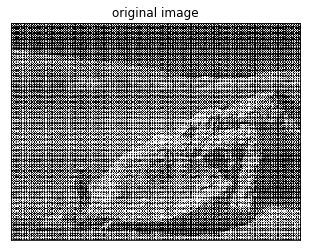

In [13]:
plt.imshow(img, cmap='gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.show()

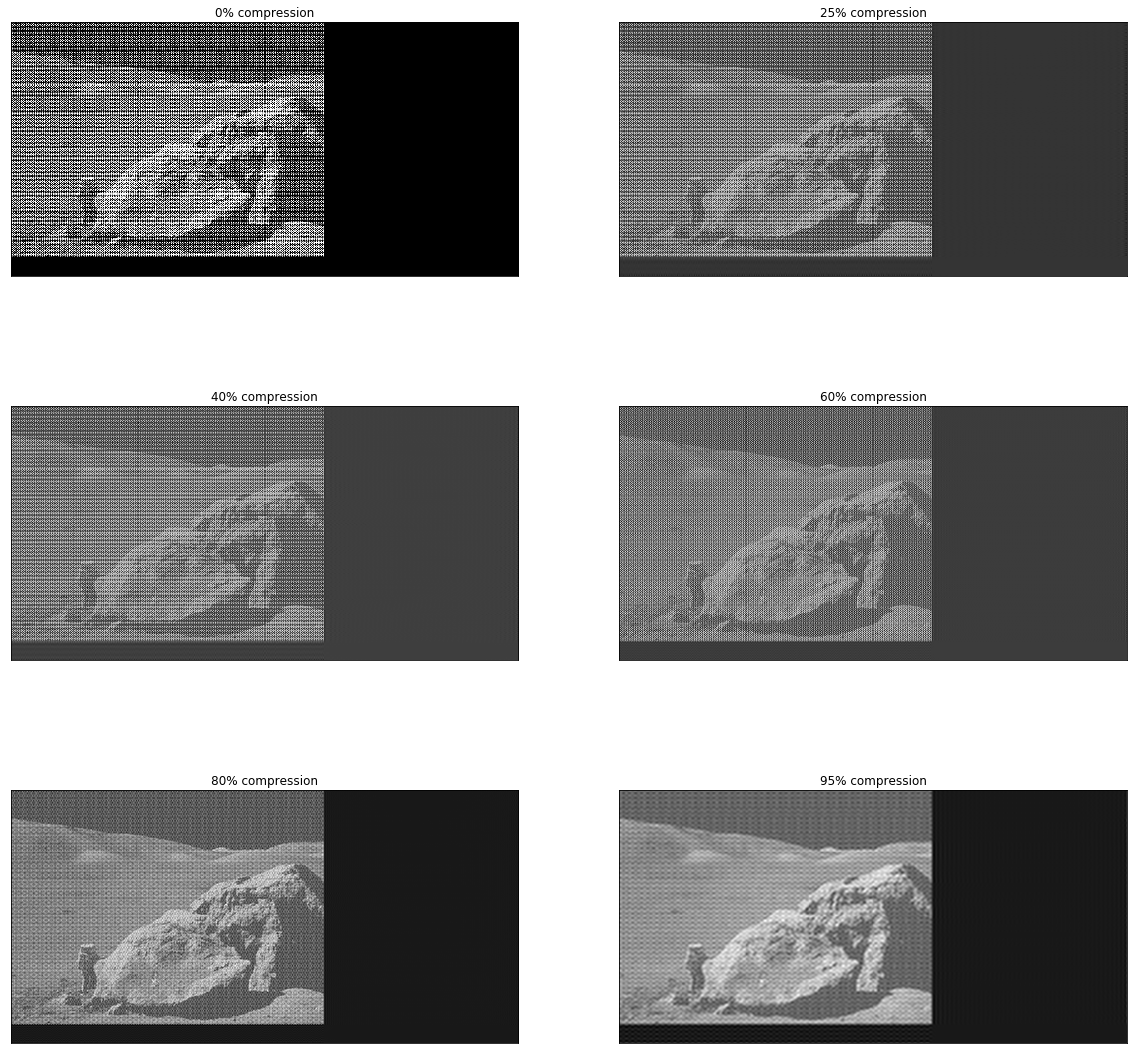

In [14]:
plt.figure(figsize=(20, 20))

plt.subplot(321), plt.imshow(uncompressed_1.real, cmap='gray')
plt.title("0% compression"), plt.xticks([]), plt.yticks([])

plt.subplot(322), plt.imshow(uncompressed_2.real, cmap = 'gray')
plt.title("25% compression"), plt.xticks([]), plt.yticks([])

plt.subplot(323), plt.imshow(uncompressed_3.real, cmap = 'gray')
plt.title("40% compression"), plt.xticks([]), plt.yticks([])

plt.subplot(324), plt.imshow(uncompressed_4.real, cmap = 'gray')
plt.title("60% compression"), plt.xticks([]), plt.yticks([])

plt.subplot(325), plt.imshow(uncompressed_5.real, cmap = 'gray')
plt.title("80% compression"), plt.xticks([]), plt.yticks([])

plt.subplot(326), plt.imshow(uncompressed_6.real, cmap = 'gray')
plt.title("95% compression"), plt.xticks([]), plt.yticks([])

plt.show()
